In [19]:
%load_ext autoreload
%autoreload 2
import argparse
import numpy as np

from src.maxent_irl_gridworld import run_maxent_irl, draw_path, init_grid_world
from src.img_utils import Visualizer, get_evd, draw_evd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

PARSER = argparse.ArgumentParser(description=None)
PARSER.add_argument('-hei', '--height', default=5, type=int, help='height of the gridworld')
PARSER.add_argument('-wid', '--width', default=5, type=int, help='width of the gridworld')
PARSER.add_argument('-g', '--gamma', default=0.8, type=float, help='discount factor')
PARSER.add_argument('-a', '--act_random', default=0.3, type=float, help='probability of acting randomly')
PARSER.add_argument('-t', '--n_trajs', default=100, type=int, help='number of expert trajectories')
PARSER.add_argument('-l', '--l_traj', default=20, type=int, help='length of expert trajectory')
PARSER.add_argument('--rand_start', dest='rand_start', action='store_true', help='when sampling trajectories, randomly pick start positions')
PARSER.add_argument('--no-rand_start', dest='rand_start',action='store_false', help='when sampling trajectories, fix start positions')
PARSER.set_defaults(rand_start=False)
PARSER.add_argument('-lr', '--learning_rate', default=0.01, type=float, help='learning rate')
PARSER.add_argument('-ni', '--n_iters', default=20, type=int, help='number of iterations')
PARSER.add_argument('-act', '--active', action='store_true', help='active learning setting')  # store true
PARSER.add_argument('-al', '--alpha', default=1.0, type=float, help='temperature parameter for value iteration')
PARSER.add_argument('-nq', '--n_query', default=1, type=int, help='number of queries to the expert(n_demonstrations)')
PARSER.add_argument('-rm', '--r_max', default=1, type=int, help='maximum reward value')
PARSER.add_argument('-er', '--error', default=0.01, type=float, help='error threshold for policy evaluation and value iteration')
PARSER.add_argument('-c', '--grad_clip', default=0.5, type=float, help='Gradient Clipping maximum L1 norm')
PARSER.add_argument('-lam', '--lam', default=0.5, type=float, help='L2 Regularizing Constant')

def parse_args_str(args_str):
    args = PARSER.parse_args(args_str.split())
    return args

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Baseline Settings: 

```python
COMMOM_ARGS = """
--height 5
--width 5
--gamma 0.8
--act_random 0.3
--n_trajs 400
--l_traj 15
--learning_rate 0.01
--n_iters 20
--alpha 0.25
--n_query 1
--r_max 1
--error 0.01
"""
```
* Alpha = 1.0 일때 exploitation 하는 경향이 있음
* Alpha = 0.1 일때 gamma 을 0.95 보다 높게 주면 MaxEnt IRL 시 value iteration에서 converge가 안됨..

In [13]:
BASE_ARGS = """
--height 5
--width 5
--gamma 0.8
--act_random 0.3
--n_trajs 400
--l_traj 15
--learning_rate 0.01
--n_iters 20
--alpha 0.25
--n_query 1
--r_max 1
--error 0.01
-c 0.5
-lam 0.1
"""

COMMOM_ARGS = """
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
-c 0.0
-lam 0.5
"""

def get_exp_name(BASE_ARGS, COMMOM_ARGS):
    # compare base_args and common_args only get different arguments
    # named with [arg1]_[value1]-[arg2]_[value2] without '--'
    # e.g. height_5-width_5
    base_args = BASE_ARGS.split('\n')
    common_args = COMMOM_ARGS.split('\n')
    exp_name = ''
    for arg in common_args:
        if arg in base_args:
            continue
        else:
            arg_name = arg.split()[0][2:]
            arg_value = arg.split()[1]
            exp_name += f'{arg_name}_{arg_value}-'
    exp_name = exp_name[:-1]
    return exp_name

exp_name = get_exp_name(BASE_ARGS, COMMOM_ARGS)
exp_name

'height_6-width_6-n_trajs_10-l_traj_6-learning_rate_0.1-n_iters_100-alpha_0.1-_0.0-am_0.5'

In [14]:
# active learning setting
args = parse_args_str(COMMOM_ARGS + '--active')
print(args)
init_start_pose = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()

history_act = run_maxent_irl(args, init_start_pose=init_start_pose)

args = parse_args_str(COMMOM_ARGS)
print(args)
init_start_pose = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
history_rand = run_maxent_irl(args, init_start_pose=init_start_pose)

Namespace(height=6, width=6, gamma=0.8, act_random=0.3, n_trajs=10, l_traj=6, rand_start=False, learning_rate=0.1, n_iters=100, active=True, alpha=0.1, n_query=1, r_max=1, error=0.01, grad_clip=0.0, lam=0.5)
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
1th trajectories.
s=(5, 5), a=u, r=0.0, s'=(4, 5)->s=(4, 5), a=l, r=0.0, s'=(4, 4)->s=(4, 4), a=s, r=1.0, s'=(4, 4)->s=(4, 4), a=s, r=1.0, s'=(4, 4)->s=(4, 4), a=s, r=1.0, s'=(4, 4)->s=(4, 4), a=s, r=1.0, s'=(4, 4)->
[INFO - n_trajs:1] Training MaxEnt IRL
iteration: 0/100
iteration: 5/100
iteration: 10/100
iteration: 15/100
iteration: 20/100
iteration: 25/100
iteration: 30/100
iteration: 35/100
iteration: 40/100
iteration: 45/100
iteration: 50/100
iteration: 55/100
iteration: 60/100
iteration: 65/100
iteration: 70/100
iteration: 75/100
iteration: 80/100
iteration: 85/100
iteration: 90/100
iteration: 95/100
--Reward Map (Recovered) when n_trajs:1--
[[0.0671180

Visualizer 선언

In [26]:
visualizer_act = Visualizer(history_act, file_path=None)
visualizer_rand = Visualizer(history_rand, file_path=None)


N_trajs = 2일때 Value maps

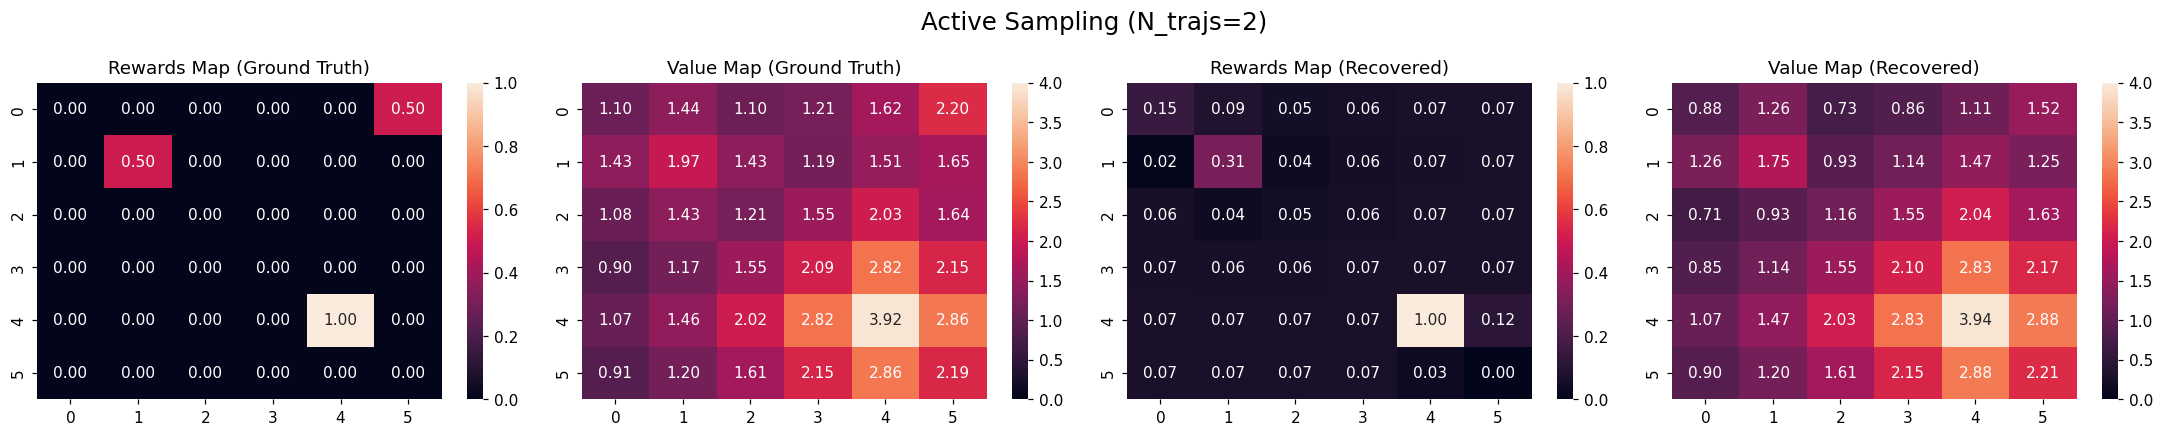

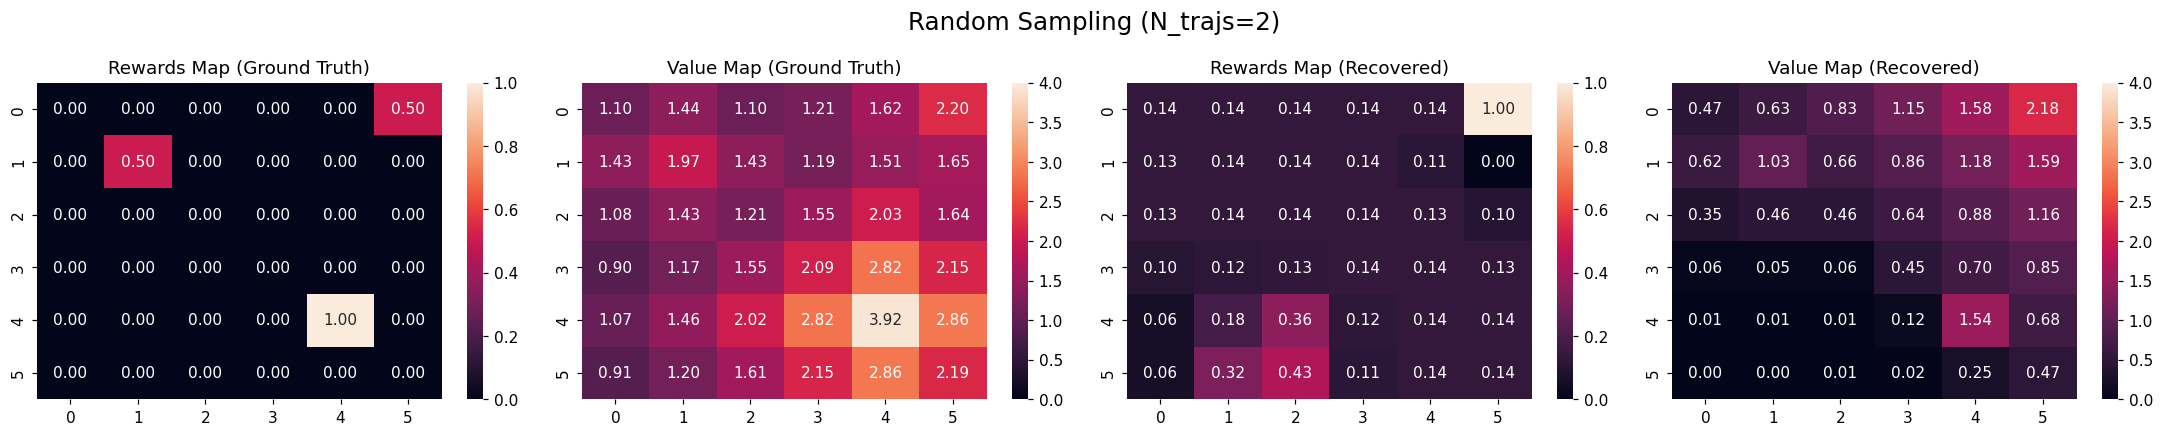

In [30]:
search_idx = 2
visualizer_act.draw_value_maps(search_idx)
visualizer_rand.draw_value_maps(search_idx)

N_trajs = 3일때 Policy maps

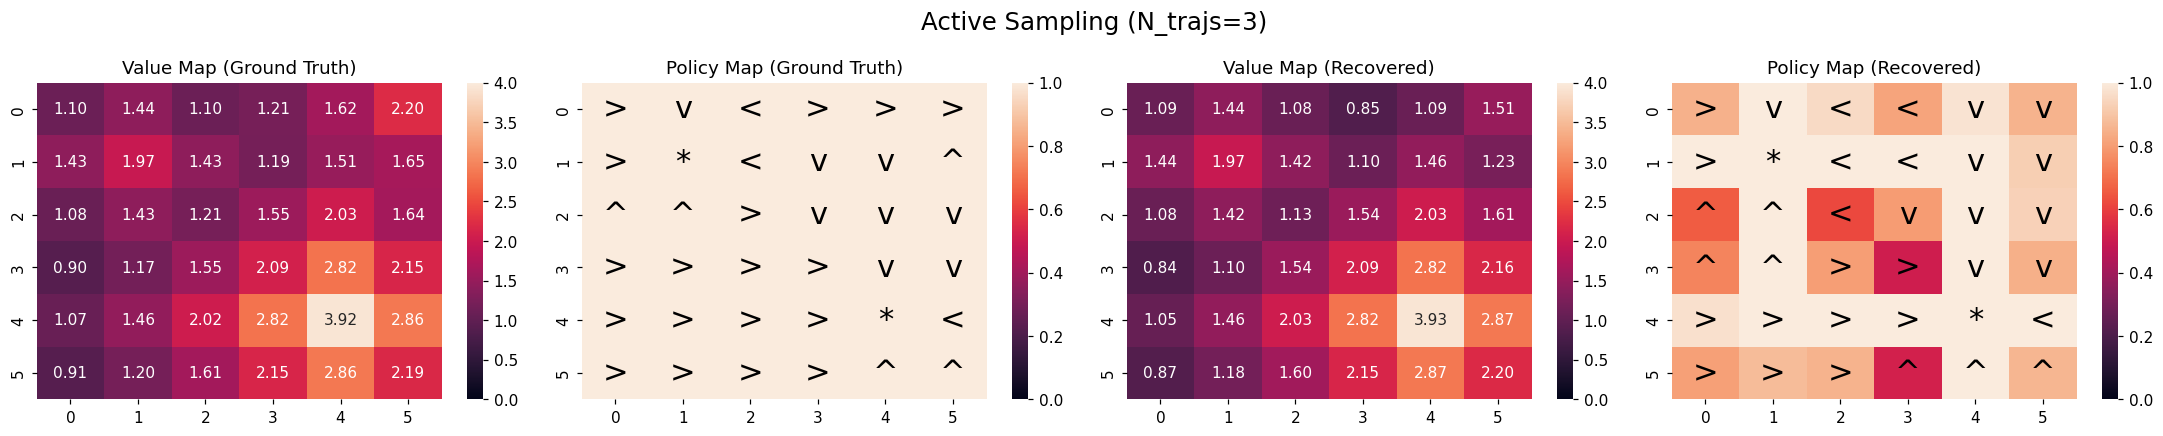

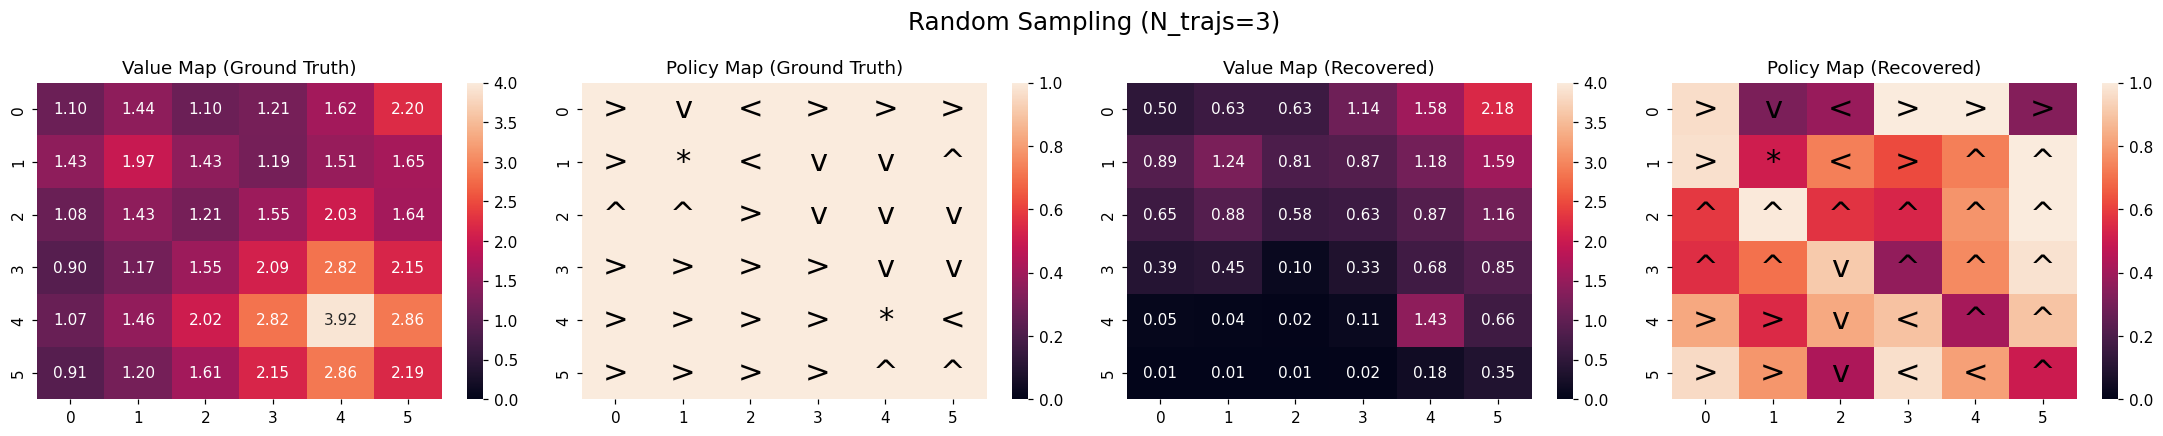

In [31]:
search_idx = 3
visualizer_act.draw_policy_maps(search_idx)
visualizer_rand.draw_policy_maps(search_idx)

N_trajs = 4일때 Acqusition ftn maps

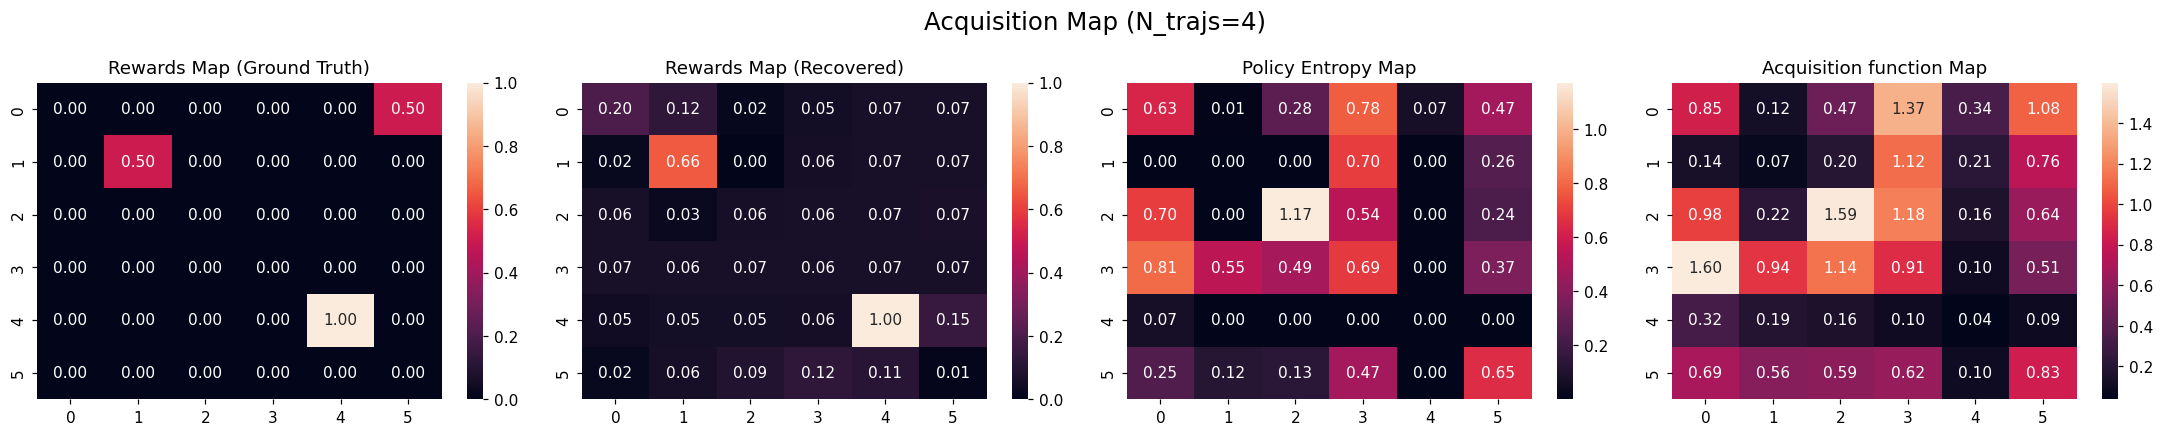

In [32]:
search_idx = 4
visualizer_act.draw_acq_maps(search_idx)

100 번의 실험 결과 evd 그래프 (시간 관계상 아직 못함)

In [ ]:
from IPython.display import clear_output
act_args = parse_args_str(COMMOM_ARGS + '--active')
rand_args = parse_args_str(COMMOM_ARGS)

evd_acts = []
evd_rands = []
for _ in range(100):
    clear_output()
    init_start_pose = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
    history_act = run_maxent_irl(act_args, init_start_pose=init_start_pose)
    history_rand = run_maxent_irl(rand_args, init_start_pose=init_start_pose)
    evd_act = get_evd(history_act)
    evd_rand = get_evd(history_rand)
    evd_acts.append(evd_act)
    evd_rands.append(evd_rand)


print(f"\nevd_acts: \n{evd_acts}")
print(f"\nevd_rands: \n{evd_rands}")
evd_acts = np.array(evd_acts)
evd_rands = np.array(evd_rands)
draw_evd(evd_acts, evd_rands)


In [110]:
import pickle
with open(f'./exps/history_act-{exp_name}.pkl', 'wb') as file:
    pickle.dump(history_act, file)
with open(f'./exps/history_rand-{exp_name}.pkl', 'wb') as file:
    pickle.dump(history_rand, file)

In [111]:
import pickle
with open(f'./exps/history_act-{exp_name}.pkl', 'rb') as file:
    history_act = pickle.load(file)
with open(f'./exps/history_rand-{exp_name}.pkl', 'rb') as file:
    history_rand = pickle.load(file)

---

In [ ]:
draw_acq_maps_w_trajs(args, info_act, history_act, num_trajs=1)
draw_acq_maps_w_trajs(args, info_act, history_act, num_trajs=2)